[Classificação] Acurácia: 1.00


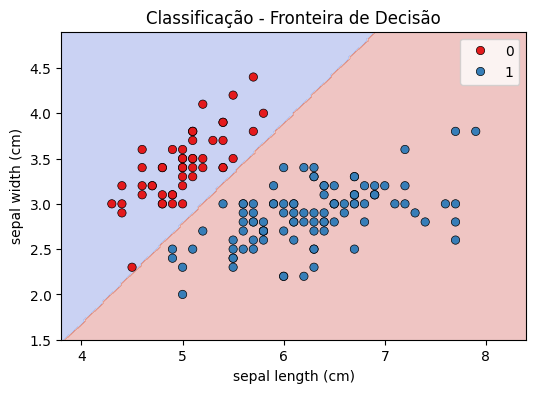

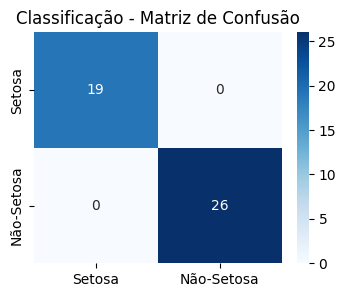

[Regressão] MSE: 234.46


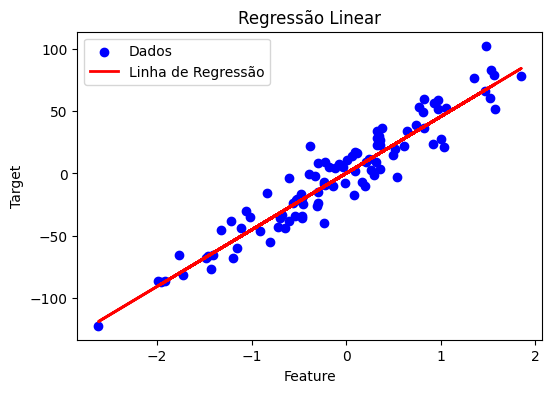

[Clustering] Centros encontrados:
[[-2.68874602  8.94622463]
 [-6.71854713 -6.84571013]
 [ 4.63064296  2.12682259]]


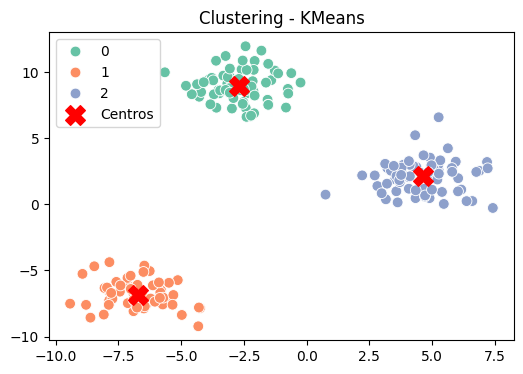


=== Chatbot Aprimorado ===
Digite 'sair' para encerrar.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_regression, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

# ===============================
# 1. CLASSIFICAÇÃO
# ===============================
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target != 0).astype(int)

# Treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predição + métrica
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"[Classificação] Acurácia: {acc:.2f}")

# Gráfico 1: Fronteira de decisão
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette="Set1", edgecolor="k")
plt.title("Classificação - Fronteira de Decisão")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

# Gráfico 2: Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Setosa","Não-Setosa"],
            yticklabels=["Setosa","Não-Setosa"])
plt.title("Classificação - Matriz de Confusão")
plt.show()

# ===============================
# 2. REGRESSÃO
# ===============================
Xr, yr = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Dividir em treino/teste
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=42)

# Modelo
reg = LinearRegression()
reg.fit(Xr_train, yr_train)

# Predição + métrica
yr_pred = reg.predict(Xr_test)
mse = mean_squared_error(yr_test, yr_pred)
print(f"[Regressão] MSE: {mse:.2f}")

# Gráfico 3: Regressão linear
plt.figure(figsize=(6,4))
plt.scatter(Xr, yr, color="blue", label="Dados")
plt.plot(Xr, reg.predict(Xr), color="red", linewidth=2, label="Linha de Regressão")
plt.title("Regressão Linear")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.show()

# ===============================
# 3. CLUSTERING
# ===============================

Xc, yc = make_blobs(n_samples=200, centers=3, random_state=42, cluster_std=1.2)

# Modelo
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(Xc)

print("[Clustering] Centros encontrados:")
print(kmeans.cluster_centers_)

# Gráfico 4: Clusters
plt.figure(figsize=(6,4))
sns.scatterplot(x=Xc[:,0], y=Xc[:,1], hue=labels, palette="Set2", s=60)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            c="red", marker="X", s=200, label="Centros")
plt.title("Clustering - KMeans")
plt.legend()
plt.show()

# ===============================
# 4. CHATBOT APRIMORADO
# ===============================
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

# Base de conhecimento (perguntas e respostas)
base_perguntas = [
    "oi", "olá", "tudo bem", "qual seu nome",
    "o que você faz", "qual sua função", "tchau", "até mais", "obrigado",
    "como você está", "quem te criou", "você é inteligente"
]
base_respostas = [
    "Oi! Como você está?",
    "Olá! Que bom te ver por aqui!",
    "Estou ótimo! E você?",
    "Sou um chatbot criado para demonstrar inteligência artificial!",
    "Eu converso com humanos e aprendo com as perguntas!",
    "Minha função é responder e ajudar da melhor forma possível!",
    "Tchau! Até a próxima!",
    "Até mais! Foi bom conversar com você!",
    "De nada!",
    "Estou bem, obrigado por perguntar!",
    "Fui criado por um programador curioso",
    "Faço o meu melhor! Alguns dizem que sim"
]

# Respostas genéricas (quando o bot não entende)
respostas_genericas = [
    "Interessante... conte-me mais sobre isso!",
    "Hmm, não tenho certeza, mas parece algo importante.",
    "Posso não entender tudo, mas estou tentando acompanhar",
    "Fale mais sobre isso, quero entender melhor!",
    "Boa pergunta! Eu ainda não sei, mas posso aprender",
    "Legal! Não sei responder exatamente, mas adorei sua curiosidade!",
    "Isso é um assunto complexo... o que você acha?",
    "Haha, essa foi boa! Me pegou nessa"
]

# Cria o vetor TF-IDF
vetorizador = TfidfVectorizer()
tfidf = vetorizador.fit_transform(base_perguntas)

def responder(pergunta_usuario):
    entrada = vetorizador.transform([pergunta_usuario])
    similaridades = cosine_similarity(entrada, tfidf)
    idx = similaridades.argmax()
    # Se a similaridade for alta, responde da base
    if similaridades[0][idx] > 0.35:
        return base_respostas[idx]
    # Caso contrário, responde algo genérico
    return random.choice(respostas_genericas)

# Loop de conversa
if __name__ == "__main__":
    print("\n=== Chatbot Aprimorado ===")
    print("Digite 'sair' para encerrar.")
    while True:
        user = input("Você: ").lower()
        if user == "sair":
            print("Chatbot: Tchau! 👋")
            break
        resposta = responder(user)
        print("Chatbot:", resposta)
